<a href="https://colab.research.google.com/github/Sunil-ai-007/weather_prediction_neaural_network/blob/main/Machine_Learning_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
weather_aus = pd.read_excel("Weather AUS.xlsx")

In [ ]:
weather_aus.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46,7.61,15,44,14,16,20,...,71,22,1007.7,1007.1,8,5,16.9,21.8,0,No
1,7.4,25.1,0.0,5.46,7.61,16,44,7,17,4,...,44,25,1010.6,1007.8,4,5,17.2,24.3,0,No
2,12.9,25.7,0.0,5.46,7.61,18,46,14,17,19,...,38,30,1007.6,1008.7,4,2,21.0,23.2,0,No
3,9.2,28.0,0.0,5.46,7.61,6,24,10,1,11,...,45,16,1017.6,1012.8,4,5,18.1,26.5,0,No
4,17.5,32.3,1.0,5.46,7.61,15,41,2,9,7,...,82,33,1010.8,1006.0,7,8,17.8,29.7,0,No


In [ ]:
weather_aus.shape

(145460, 21)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
# To gain the information about the number of data, row, column and types of different data types
weather_aus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   Evaporation    145460 non-null  float64
 4   Sunshine       145460 non-null  float64
 5   WindGustDir    145460 non-null  int64  
 6   WindGustSpeed  145460 non-null  int64  
 7   WindDir9am     145460 non-null  int64  
 8   WindDir3pm     145460 non-null  int64  
 9   WindSpeed9am   145460 non-null  int64  
 10  WindSpeed3pm   145460 non-null  int64  
 11  Humidity9am    145460 non-null  int64  
 12  Humidity3pm    145460 non-null  int64  
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Cloud9am       145460 non-null  int64  
 16  Cloud3pm       145460 non-null  int64  
 17  Temp9am        145460 non-nul

In [ ]:
# To get the descriptive statisics of the data
weather_aus.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,145460.0,12.193993,6.365750,-8.5,7.70,12.10,16.80,33.9
MaxTemp,145460.0,23.221337,7.088124,-4.8,18.00,22.70,28.20,48.1
Rainfall,145460.0,2.360898,8.382488,0.0,0.00,0.00,1.00,371.0
Evaporation,145460.0,5.464678,3.161544,0.0,4.00,5.46,5.46,145.0
Sunshine,145460.0,7.610612,2.729486,0.0,7.61,7.61,8.70,14.5
WindGustDir,145460.0,10.155197,4.792430,1.0,6.00,11.00,15.00,18.0
WindGustSpeed,145460.0,40.032744,13.118256,6.0,31.00,39.00,46.00,135.0
WindDir9am,145460.0,7.999526,4.515839,1.0,4.00,8.00,12.00,16.0
WindDir3pm,145460.0,9.269036,5.071950,1.0,4.00,10.00,14.00,17.0
WindSpeed9am,145460.0,14.042898,8.861060,0.0,7.00,13.00,19.00,130.0


In [ ]:
#To Find Out the Percentage of The data missing in the Data Sheet
weather_aus.isnull().sum()/len(weather_aus)*100

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [ ]:
r = weather_aus["RainTomorrow"].value_counts()

([<matplotlib.patches.Wedge at 0x7f3e52873100>,
 [Text(-0.8494423969509877, 0.6988902734064634, 'No'),
  Text(0.8494424623858133, -0.6988901938759238, 'Yes')])

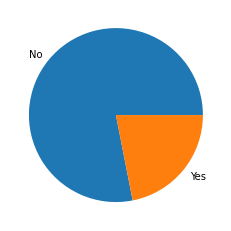

In [ ]:
plt.pie(r, labels = r.index)

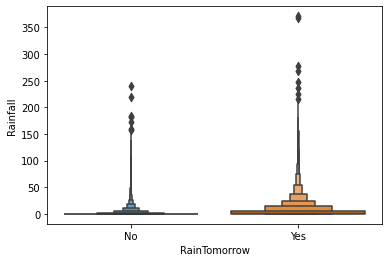

In [ ]:
sns.boxenplot(y="Rainfall",x="RainTomorrow",data=weather_aus)

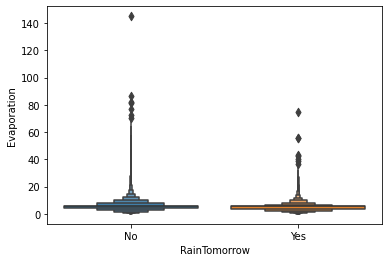

In [ ]:
sns.boxenplot(y="Evaporation",x="RainTomorrow",data=weather_aus);

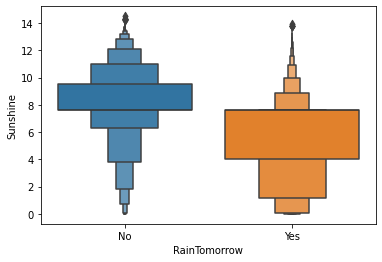

In [ ]:
sns.boxenplot(y="Sunshine",x="RainTomorrow",data=weather_aus)

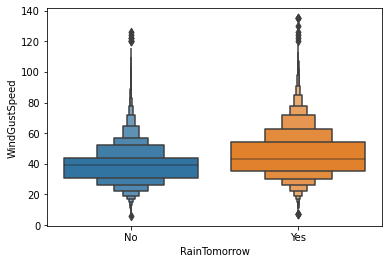

In [ ]:
sns.boxenplot(y="WindGustSpeed",x="RainTomorrow",data=weather_aus)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
weather_aus["RainTomorrow"]

0         No
1         No
2         No
3         No
4         No
          ..
145455    No
145456    No
145457    No
145458    No
145459    No
Name: RainTomorrow, Length: 145460, dtype: object

In [ ]:
weather_aus["RainTomorrow"].replace({"No":0,"Yes":1},inplace=True)

In [ ]:
x=weather_aus.drop("RainTomorrow", axis = 1)

In [ ]:
y=weather_aus["RainTomorrow"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
x_train.shape

(116368, 20)

In [ ]:
y_train.shape

(116368,)

In [ ]:
#Sequentional Format
from keras.models import Sequential

In [ ]:
#Dense connection
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
x_train.shape[1]

20

In [ ]:
weather_aus_NN = Sequential()

In [ ]:
weather_aus_NN.add( Dense(128, activation = "sigmoid", input_dim = 20) )

In [ ]:
weather_aus_NN.add( Dense(64, activation = "sigmoid") )

In [ ]:
weather_aus_NN.add( Dense(32, activation = "sigmoid") )

In [ ]:
weather_aus_NN.add( Dense(16, activation = "sigmoid") )

In [ ]:
weather_aus_NN.add( Dense(12, activation = "sigmoid") )

In [ ]:
weather_aus_NN.add( Dense (1))

In [ ]:
weather_aus_NN.compile(loss="binary_crossentropy", optimizer = "RMSprop" , metrics = ["accuracy"])

In [ ]:
weather_aus_NN.fit(x_train, y_train, epochs = 20)

Epoch 1/20
3637/3637 [==============================] - 9s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 2/20
3637/3637 [==============================] - 8s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 3/20
3637/3637 [==============================] - 8s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 4/20
3637/3637 [==============================] - 7s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 5/20
3637/3637 [==============================] - 7s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 6/20
3637/3637 [==============================] - 8s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 7/20
3637/3637 [==============================] - 8s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 8/20
3637/3637 [==============================] - 8s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 9/20
3637/3637 [==============================] - 8s 2ms/step - loss: 3.3918 - accuracy: 0.7801
Epoch 10/20
3637/3637 [==============================] - 7s 2ms/step - loss: 3.391

In [ ]:
Weather_Aus_pred = weather_aus_NN.predict(x_test)
Weather_Aus_pred = Weather_Aus_pred.flatten()
print(Weather_Aus_pred.round(2))

910/910 [==============================] - 1s 1ms/step
[-0.41 -0.41 -0.41 ... -0.41 -0.41 -0.41]


In [ ]:
y_pred = np.where(Weather_Aus_pred > 0.50, 1, 0)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[22803     0]
 [ 6289     0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     22803
           1       0.00      0.00      0.00      6289

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.61      0.78      0.69     29092



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
